In [2]:
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
linear_svc = LinearSVC(random_state=42)
linear_svc.fit(X_train, y_train)

LinearSVC(random_state=42)

In [5]:
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [6]:
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)
sgd_classifier.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [7]:
def plot_decision_boundaries(X, y, model, ax, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    ax.set_title(title)

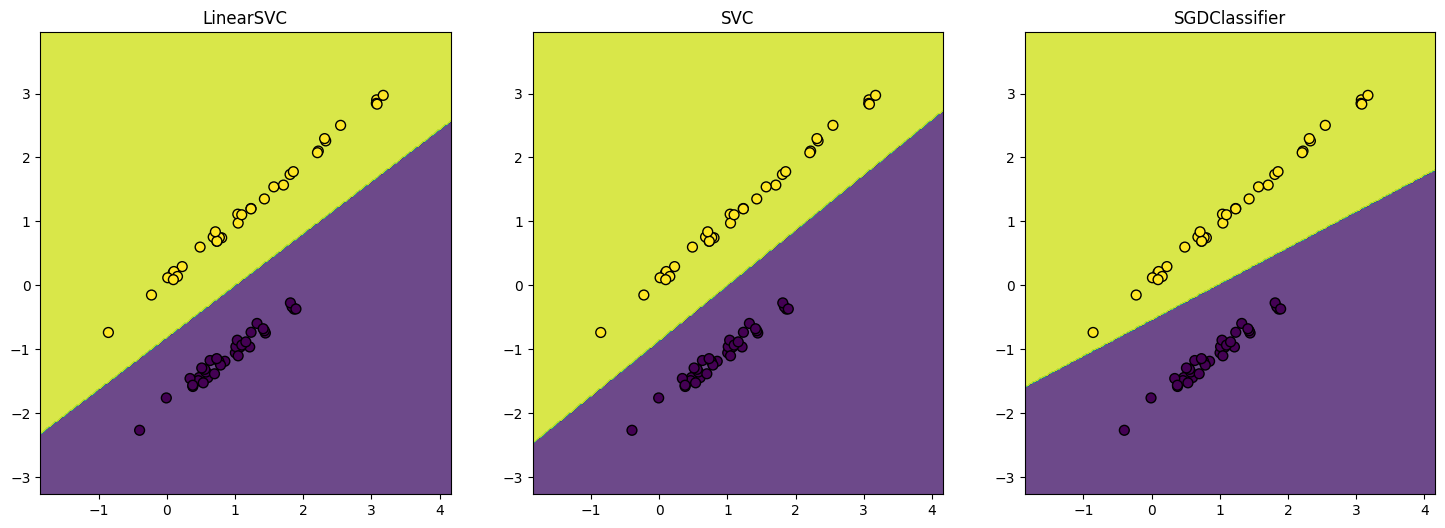

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plot_decision_boundaries(X_train, y_train, linear_svc, axes[0], "LinearSVC")
plot_decision_boundaries(X_train, y_train, svc, axes[1], "SVC")
plot_decision_boundaries(X_train, y_train, sgd_classifier, axes[2], "SGDClassifier")

plt.show()
